In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
import pickle

'''
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:,.5f}'.format)
'''

"\npd.set_option('display.max_rows', 500)\npd.set_option('display.max_columns', 500)\npd.set_option('display.width', 1000)\npd.set_option('display.float_format', '{:,.5f}'.format)\n"

In [10]:
fac = pd.read_csv('../data/all_facilities.csv')
fac=fac.replace(r'^\s*$', np.nan, regex=True)
print(fac.shape)
fac

(307, 279)


,Unnamed: 0,hotel_name_,all_facilities,unlist,in_top_facilities,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,...,high chair,visual aids (tactile signs),cantonese,public transit tickets,public bath,water park,executive lounge access,ipad,bingo,additional bathroom
0,0,RedDoorz near East Avenue Medical Center,"[['Toilet paper', 'Towels', 'Towels/Sheets (ex...","['toilet paper', 'towels', 'towels/sheets (ext...","['toilet paper', 'towels', 'towels/sheets (ext...",1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Skylab Guesthouse,"[['Toilet paper', 'Towels', 'Additional bathro...","['toilet paper', 'towels', 'additional bathroo...","['toilet paper', 'towels', 'additional bathroo...",1,1,1,0,0,...,0,0,0,0,0,0,1,1,1,1
2,2,The Excelsior Hotel Las Piñas,"[['Toilet paper', 'Towels', 'Bidet', 'Guest ba...","['toilet paper', 'towels', 'bidet', 'guest bat...","['toilet paper', 'towels', 'bidet', 'guest bat...",1,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
3,3,Rothman Hotel,"[['Private Bathroom', 'Toilet', 'Free toiletri...","['private bathroom', 'toilet', 'free toiletrie...","['private bathroom', 'toilet', 'free toiletrie...",1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,OYO 772 Remedios Apartment,"[['TV'], ['Daily housekeeping', 'Concierge'], ...","['tv', 'daily housekeeping', 'concierge', 'fir...","['tv', 'daily housekeeping', 'concierge', 'fir...",1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,302,RedDoorz at EDSA Pasay,"[['Toilet paper', 'Towels', 'Towels/Sheets (ex...","['toilet paper', 'towels', 'towels/sheets (ext...","['toilet paper', 'towels', 'towels/sheets (ext...",1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
303,303,Kabayan Hotel Pasay,"[['Toilet paper', 'Towels', 'Bidet', 'Slippers...","['toilet paper', 'towels', 'bidet', 'slippers'...","['toilet paper', 'towels', 'bidet', 'slippers'...",1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
304,304,"Crimson Hotel Filinvest City, Manila","[['Themed dinners', 'Temporary art galleries']...","['themed dinners', 'temporary art galleries', ...","['themed dinners', 'temporary art galleries', ...",1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
305,305,RedDoorz @ Jardin LRT Tayuman Manila,"[['Toilet paper', 'Towels', 'Towels/Sheets (ex...","['toilet paper', 'towels', 'towels/sheets (ext...","['toilet paper', 'towels', 'towels/sheets (ext...",1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
revs = pickle.load(open('../data/hotel_info_final.pkl', "rb"))
revs=revs.replace(r'^\s*$', np.nan, regex=True)
print(revs.shape)
revs

(307, 71)


,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,...,hairdryer,slippers,key access,accessible parking,facilities for disabled guests,wardrobe or closet,clothes rack,socket near the bed,bar,ironing service
0,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,0
1,Skylab Guesthouse,2,"213B, Aldrin Street, Moonwalk Village 1, Parañ...",8.0,You're eligible for a Genius discount at Skyla...,"[Non Smoking Rooms, Spa & Wellness Centre, Fre...",79,"[8.8, 7.8, 8.3, 8.4, 8.4, 8.1, 7.5]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.8', 'Facilities': '7.8', 'Cleanli...",...,1,1,1,0,0,0,0,1,0,1
2,The Excelsior Hotel Las Piñas,4,"1345 Alabang–Zapote Road, Las Pinas, 1750 Mani...",7.3,"Located in Manila, 12.2 km from Mall of Asia A...","[Swimming pool, Airport Shuttle, Non Smoking R...",6,"[7.9, 8.3, 7.9, 8.8, 7.9, 7.9, 7.9]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '7.9', 'Facilities': '8.3', 'Cleanli...",...,1,1,0,1,0,1,1,1,1,0
3,Rothman Hotel,3,"1633 M. Adriatico St., Malate, 1004 Manila, Ph...",7.8,Rothman Hotel is located in the district of Ma...,"[Non Smoking Rooms, Room-service, Free Parking...",45,"[8.3, 7.6, 8.0, 7.8, 7.8, 8.7, 8.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.3', 'Facilities': '7.6', 'Cleanli...",...,0,0,0,0,1,0,0,0,1,1
4,OYO 772 Remedios Apartment,3,"909, Remedios St, Manila Malate Manila, 1004 M...",6.8,You're eligible for a Genius discount at OYO 7...,"[Non Smoking Rooms, Free WiFi Internet Access ...",113,"[7.5, 6.5, 6.9, 6.9, 7.0, 7.7, 8.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '7.5', 'Facilities': '6.5', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,RedDoorz at EDSA Pasay,2,"525 EDSA, Pasay City, Pasay, 1300 Manila, Phil...",6.9,Located in Manila within 2.7 km of Mall of Asi...,"[Free WiFi Internet Access Included, Free WiFi...",378,"[7.6, 7.0, 7.4, 7.3, 7.4, 7.6, 7.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '7.6', 'Facilities': '7.0', 'Cleanli...",...,0,0,1,0,0,0,0,0,0,0
303,Kabayan Hotel Pasay,3,"2878 Zamora Street corner EDSA Rotonda, Pasay,...",6.8,You're eligible for a Genius discount at Kabay...,"[Non Smoking Rooms, Room-service, Free WiFi In...","1,892","[8.1, 6.8, 6.9, 7.0, 7.0, 7.6, 7.2]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.1', 'Facilities': '6.8', 'Cleanli...",...,0,1,0,0,0,0,1,0,0,0
304,"Crimson Hotel Filinvest City, Manila",5,"2609 Civic Drive, Entrata Urban Complex, Filin...",8.1,You're eligible for a Genius discount at Crims...,"[Swimming pool, Airport Shuttle, Non Smoking R...",769,"[8.8, 8.2, 8.4, 8.5, 8.2, 8.9, 7.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.8', 'Facilities': '8.2', 'Cleanli...",...,0,0,0,1,1,0,0,0,1,0
305,RedDoorz @ Jardin LRT Tayuman Manila,2,"1830 Rizal Avenue, 1008 Manila, Philippines",7.3,Ideally located in the Santa Cruz district of ...,"[Non Smoking Rooms, Free WiFi Internet Access ...",49,"[7.8, 7.5, 7.6, 7.7, 7.6, 8.0, 4.2]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '7.8', 'Facilities': '7.5', 'Cleanli...",...,0,0,0,0,0,0,0,0,0,0


In [38]:
fac['review_score'] = revs['review_rating']
fac['stars'] = revs['stars']
fac

,Unnamed: 0,hotel_name_,all_facilities,unlist,in_top_facilities,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,...,public bath,water park,executive lounge access,ipad,bingo,additional bathroom,review_score,good_review,type of review,stars
0,0,RedDoorz near East Avenue Medical Center,"[['Toilet paper', 'Towels', 'Towels/Sheets (ex...","['toilet paper', 'towels', 'towels/sheets (ext...","['toilet paper', 'towels', 'towels/sheets (ext...",1,1,1,0,0,...,0,0,0,0,0,0,6.0,0,bad_review,2
1,1,Skylab Guesthouse,"[['Toilet paper', 'Towels', 'Additional bathro...","['toilet paper', 'towels', 'additional bathroo...","['toilet paper', 'towels', 'additional bathroo...",1,1,1,0,0,...,0,0,1,1,1,1,8.0,1,good_review,2
2,2,The Excelsior Hotel Las Piñas,"[['Toilet paper', 'Towels', 'Bidet', 'Guest ba...","['toilet paper', 'towels', 'bidet', 'guest bat...","['toilet paper', 'towels', 'bidet', 'guest bat...",1,1,1,1,1,...,1,1,0,0,0,0,7.3,0,bad_review,4
3,3,Rothman Hotel,"[['Private Bathroom', 'Toilet', 'Free toiletri...","['private bathroom', 'toilet', 'free toiletrie...","['private bathroom', 'toilet', 'free toiletrie...",1,1,0,1,1,...,0,0,0,0,0,0,7.8,1,good_review,3
4,4,OYO 772 Remedios Apartment,"[['TV'], ['Daily housekeeping', 'Concierge'], ...","['tv', 'daily housekeeping', 'concierge', 'fir...","['tv', 'daily housekeeping', 'concierge', 'fir...",1,1,1,1,0,...,0,0,0,0,0,0,6.8,0,bad_review,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,302,RedDoorz at EDSA Pasay,"[['Toilet paper', 'Towels', 'Towels/Sheets (ex...","['toilet paper', 'towels', 'towels/sheets (ext...","['toilet paper', 'towels', 'towels/sheets (ext...",1,0,1,1,1,...,0,0,0,0,0,0,6.9,0,bad_review,2
303,303,Kabayan Hotel Pasay,"[['Toilet paper', 'Towels', 'Bidet', 'Slippers...","['toilet paper', 'towels', 'bidet', 'slippers'...","['toilet paper', 'towels', 'bidet', 'slippers'...",1,1,1,1,1,...,0,0,0,0,0,0,6.8,0,bad_review,3
304,304,"Crimson Hotel Filinvest City, Manila","[['Themed dinners', 'Temporary art galleries']...","['themed dinners', 'temporary art galleries', ...","['themed dinners', 'temporary art galleries', ...",1,1,1,1,0,...,0,0,0,0,0,0,8.1,1,good_review,5
305,305,RedDoorz @ Jardin LRT Tayuman Manila,"[['Toilet paper', 'Towels', 'Towels/Sheets (ex...","['toilet paper', 'towels', 'towels/sheets (ext...","['toilet paper', 'towels', 'towels/sheets (ext...",1,1,0,1,1,...,0,0,0,0,0,0,7.3,0,bad_review,2


In [39]:
df = fac

In [42]:
df["stars"]

0      2
1      2
2      4
3      3
4      3
      ..
302    2
303    3
304    5
305    2
306    3
Name: stars, Length: 307, dtype: int64

In [43]:
def plot_bar_sp(df,c,title,dmap="default",orient='x',clr='#6cc8ba',hue=False, \
                 time_series=False, month_data=False,week_data=False,pod_data=False, long_dates=False,ax=None,limited=False):
    #F25278
    ax = ax or plt.gca()
    
    #data_df=df
    data_df = df[[c]]
    
    
    if hue!=False:  
        data_df = df[[c]+[hue]]
        #print(data_df)
    
    
       
    
    if dmap=="default":
        data_df['Class'] = data_df[c]
    
    else:
        data_df['Class'] = data_df[c].map(dmap)
    #print(data_df)
    
    #Order
    if time_series==False:
        o=data_df['Class'].value_counts().index
        #print(o)
    
    #Time- Series ORder
    else:
        o=data_df['Class'].value_counts().index.sort_values(ascending=True)
        
        
        if month_data==True:
            o=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct", "Nov", "Dec"]
            if long_dates==True:
                o=["January","February","March","April","May","June","July","August","September","October", "November", "December"]  
        if week_data==True:
            o=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"] 
            if long_dates==True:
                o=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"] 
                
        if pod_data==True:
            o=["early morning","breakfast","lunch","afternoon","dinner"] 
                #Would change this to off Hours
        
    if limited!=False:
        o=o[:limited]
        #print(o)
   
    #data_df["Class"]=data_df["Class"].astype(str)
    #print(data_df)
    #hue
    if hue==False:  
        if orient=='x':
            return sns.countplot(x=data_df['Class'], order=o,ax=ax, color=clr)
            

        else:
            return sns.countplot(y=data_df['Class'],order=o ,ax=ax,color=clr)
        
    if hue!=False:  
        #data_df["Class"]=data_df["Class"].astype(str)
        #l=o[:10]
        data_df["Class"] = pd.Categorical(data_df['Class'], o)
        if orient=='x':
            return sns.histplot(data_df, x="Class", hue="good_review", stat="percent",ax=ax,multiple="layer", shrink=.4,common_norm=False)

        else:
            return sns.histplot(data_df, y="Class", hue="good_review", stat="percent",ax=ax,multiple="dodge", shrink=.2,common_norm=False)

    ax.set_title(title)

In [54]:
df["review_score"] = pd.to_numeric(df["review_score"], downcast="float")

In [55]:
df["review_score"]

0      6.0
1      8.0
2      7.3
3      7.8
4      6.8
      ... 
302    6.9
303    6.8
304    8.1
305    7.3
306    7.5
Name: review_score, Length: 307, dtype: float32

In [57]:
df["good_review"]=np.where(df["review_score"]>=7.5,1,0)
df

,Unnamed: 0,hotel_name_,all_facilities,unlist,in_top_facilities,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,...,public bath,water park,executive lounge access,ipad,bingo,additional bathroom,review_score,good_review,type of review,stars
0,0,RedDoorz near East Avenue Medical Center,"[['Toilet paper', 'Towels', 'Towels/Sheets (ex...","['toilet paper', 'towels', 'towels/sheets (ext...","['toilet paper', 'towels', 'towels/sheets (ext...",1,1,1,0,0,...,0,0,0,0,0,0,6.0,0,bad_review,2
1,1,Skylab Guesthouse,"[['Toilet paper', 'Towels', 'Additional bathro...","['toilet paper', 'towels', 'additional bathroo...","['toilet paper', 'towels', 'additional bathroo...",1,1,1,0,0,...,0,0,1,1,1,1,8.0,1,good_review,2
2,2,The Excelsior Hotel Las Piñas,"[['Toilet paper', 'Towels', 'Bidet', 'Guest ba...","['toilet paper', 'towels', 'bidet', 'guest bat...","['toilet paper', 'towels', 'bidet', 'guest bat...",1,1,1,1,1,...,1,1,0,0,0,0,7.3,0,bad_review,4
3,3,Rothman Hotel,"[['Private Bathroom', 'Toilet', 'Free toiletri...","['private bathroom', 'toilet', 'free toiletrie...","['private bathroom', 'toilet', 'free toiletrie...",1,1,0,1,1,...,0,0,0,0,0,0,7.8,1,good_review,3
4,4,OYO 772 Remedios Apartment,"[['TV'], ['Daily housekeeping', 'Concierge'], ...","['tv', 'daily housekeeping', 'concierge', 'fir...","['tv', 'daily housekeeping', 'concierge', 'fir...",1,1,1,1,0,...,0,0,0,0,0,0,6.8,0,bad_review,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,302,RedDoorz at EDSA Pasay,"[['Toilet paper', 'Towels', 'Towels/Sheets (ex...","['toilet paper', 'towels', 'towels/sheets (ext...","['toilet paper', 'towels', 'towels/sheets (ext...",1,0,1,1,1,...,0,0,0,0,0,0,6.9,0,bad_review,2
303,303,Kabayan Hotel Pasay,"[['Toilet paper', 'Towels', 'Bidet', 'Slippers...","['toilet paper', 'towels', 'bidet', 'slippers'...","['toilet paper', 'towels', 'bidet', 'slippers'...",1,1,1,1,1,...,0,0,0,0,0,0,6.8,0,bad_review,3
304,304,"Crimson Hotel Filinvest City, Manila","[['Themed dinners', 'Temporary art galleries']...","['themed dinners', 'temporary art galleries', ...","['themed dinners', 'temporary art galleries', ...",1,1,1,1,0,...,0,0,0,0,0,0,8.1,1,good_review,5
305,305,RedDoorz @ Jardin LRT Tayuman Manila,"[['Toilet paper', 'Towels', 'Towels/Sheets (ex...","['toilet paper', 'towels', 'towels/sheets (ext...","['toilet paper', 'towels', 'towels/sheets (ext...",1,1,0,1,1,...,0,0,0,0,0,0,7.3,0,bad_review,2


In [58]:
df.groupby("good_review").sum()

,Unnamed: 0,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,smoke alarms,toilet,tv,24-hour security,...,cantonese,public transit tickets,public bath,water park,executive lounge access,ipad,bingo,additional bathroom,review_score,stars
good_review,,,,,,,,,,,,,,,,,,,,,
0,15800,126,112,103,115,100,88,94,92,87,...,0,0,1,1,0,0,0,0,844.799988,331
1,31171,176,169,148,170,137,135,124,125,130,...,1,1,0,0,1,1,1,1,1465.400024,573


In [68]:
df.groupby("stars").mean()

,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,smoke alarms,toilet,tv,24-hour security,towels,...,public transit tickets,public bath,water park,executive lounge access,ipad,bingo,additional bathroom,review_score,good_review,total_facilities
stars,,,,,,,,,,,,,,,,,,,,,
1,0.916667,1.000000,1.000000,1.000000,0.833333,0.833333,0.750000,0.833333,0.833333,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.441667,0.250000,27.000000
2,0.987952,0.843373,0.855422,0.903614,0.807229,0.698795,0.698795,0.710843,0.626506,0.722892,...,0.000000,0.000000,0.000000,0.012048,0.012048,0.012048,0.012048,7.162651,0.397590,33.132530
3,0.980263,0.940789,0.789474,0.927632,0.756579,0.703947,0.710526,0.736842,0.697368,0.703947,...,0.006579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.563158,0.605263,49.848684
4,1.000000,0.933333,0.900000,0.966667,0.833333,0.933333,0.800000,0.633333,0.900000,0.766667,...,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,7.833333,0.733333,73.466667
5,1.000000,0.933333,0.700000,0.933333,0.666667,0.666667,0.633333,0.566667,0.733333,0.566667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.460000,0.933333,90.966667


good_review    178
bad_review     129
Name: type of review, dtype: int64

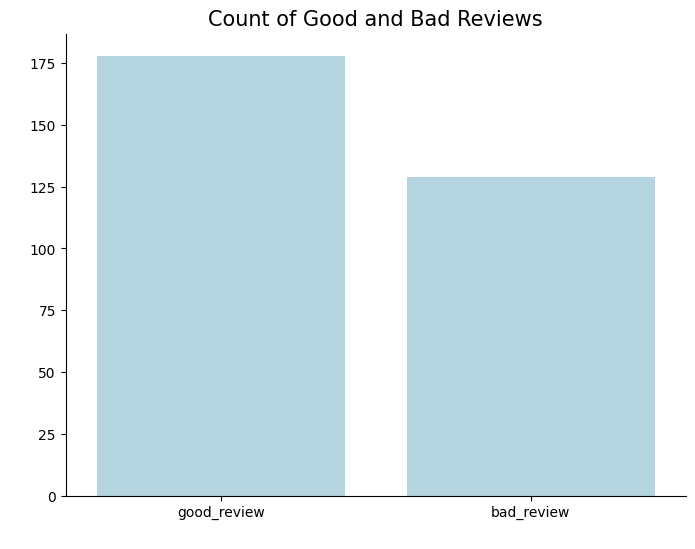

In [59]:
review_map = {0: 'bad_review', 1: 'good_review'}
df['type of review'] = df['good_review'].map(review_map)
color = ['lightblue']

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x=df['type of review'],
              order=df['type of review'].value_counts().index,
              color='lightblue')
ax.set_xlabel(' ')
ax.set_ylabel(' ')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title(f'Count of Good and Bad Reviews', size=15, y=1)
display(df['type of review'].value_counts())
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'hotel_name_', 'all_facilities', 'unlist',
       'in_top_facilities', 'air conditioning', 'non-smoking rooms',
       'fire extinguishers', 'cctv in common areas', 'private bathroom',
       ...
       'public transit tickets', 'public bath', 'water park',
       'executive lounge access', 'ipad', 'bingo', 'additional bathroom',
       'review_score', 'good_review', 'type of review'],
      dtype='object', length=282)

In [60]:
to_drop = ['Unnamed: 0', 'all_facilities', 'unlist',
       'in_top_facilities']


In [61]:
df = df.drop(to_drop, axis=1)

In [62]:
df.shape

(307, 279)

In [63]:
df.iloc[:, 1:275]

,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,smoke alarms,toilet,tv,24-hour security,towels,...,high chair,visual aids (tactile signs),cantonese,public transit tickets,public bath,water park,executive lounge access,ipad,bingo,additional bathroom
0,1,1,1,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,0,0,0,0
3,1,1,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
303,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
304,1,1,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
305,1,1,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df['total_facilities'] = df.iloc[:, 1:275].sum(axis=1)
df['total_facilities']

0       25
1      112
2      118
3       67
4       12
      ... 
302     25
303     57
304     62
305     21
306     64
Name: total_facilities, Length: 307, dtype: int64

<AxesSubplot: xlabel='total_facilities', ylabel='Density'>

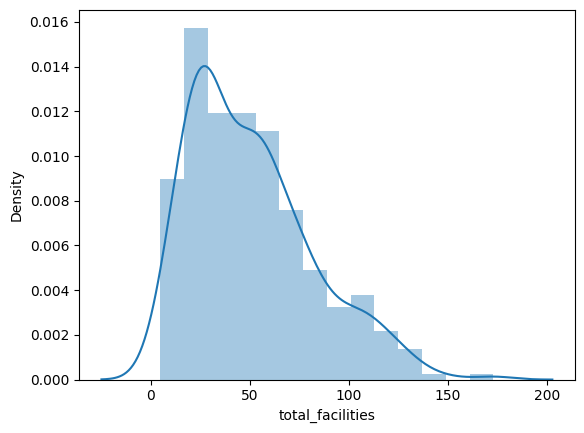

In [65]:
sns.distplot(df['total_facilities'])

In [66]:
df

,hotel_name_,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,smoke alarms,toilet,tv,24-hour security,...,water park,executive lounge access,ipad,bingo,additional bathroom,review_score,good_review,type of review,stars,total_facilities
0,RedDoorz near East Avenue Medical Center,1,1,1,0,0,1,1,0,1,...,0,0,0,0,0,6.0,0,bad_review,2,25
1,Skylab Guesthouse,1,1,1,0,0,0,1,0,1,...,0,1,1,1,1,8.0,1,good_review,2,112
2,The Excelsior Hotel Las Piñas,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,7.3,0,bad_review,4,118
3,Rothman Hotel,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,7.8,1,good_review,3,67
4,OYO 772 Remedios Apartment,1,1,1,1,0,1,0,1,0,...,0,0,0,0,0,6.8,0,bad_review,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,RedDoorz at EDSA Pasay,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,6.9,0,bad_review,2,25
303,Kabayan Hotel Pasay,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,6.8,0,bad_review,3,57
304,"Crimson Hotel Filinvest City, Manila",1,1,1,1,0,1,0,0,1,...,0,0,0,0,0,8.1,1,good_review,5,62
305,RedDoorz @ Jardin LRT Tayuman Manila,1,1,0,1,1,0,1,1,0,...,0,0,0,0,0,7.3,0,bad_review,2,21


In [79]:
dfs = df[(df['stars'] == 5) & (df['good_review'] == 1)]
total_cols = dfs.shape[0]
dfs = dfs.set_index('hotel_name_')
to_drop = ['total_facilities','stars', 'review_score', 'type of review', 'good_review']
dfs = dfs.drop(to_drop, axis=1)


dfs.head()

,air conditioning,non-smoking rooms,fire extinguishers,cctv in common areas,private bathroom,smoke alarms,toilet,tv,24-hour security,towels,...,high chair,visual aids (tactile signs),cantonese,public transit tickets,public bath,water park,executive lounge access,ipad,bingo,additional bathroom
hotel_name_,,,,,,,,,,,,,,,,,,,,,
Havitat Boutique Hotel,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Sultana Ysabella Hotel and Event,1,0,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Calathea Place by DMCI in Paranaque,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
The Residences at BCCT,1,1,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Oceanic-feels 1 Bedroom with Balcony Deluxe Condotel,1,1,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


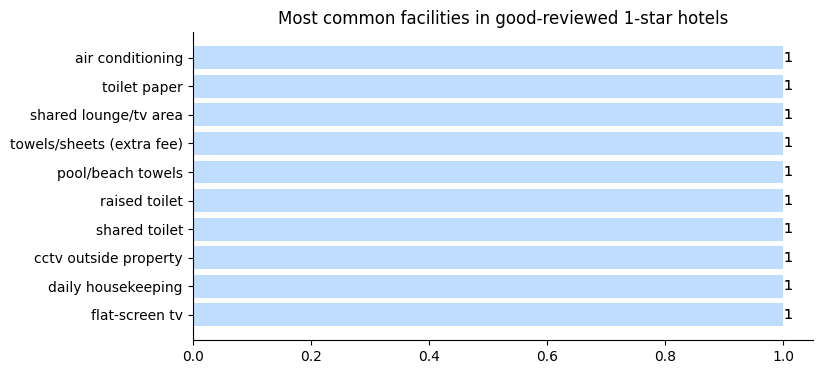

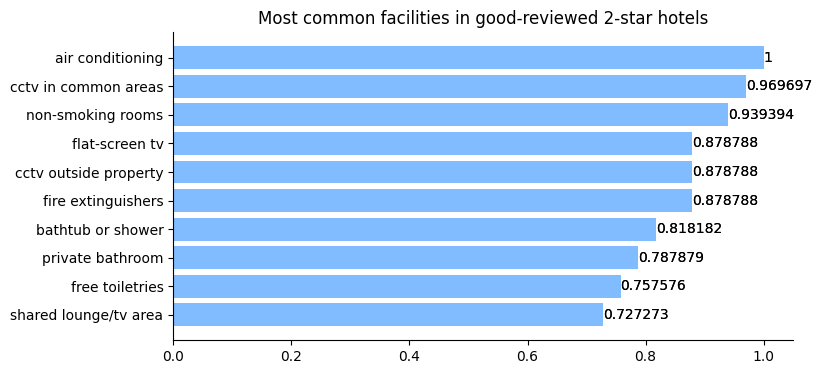

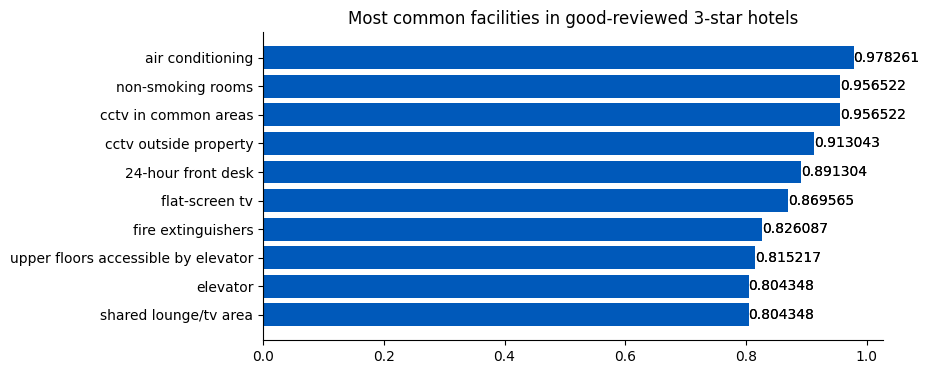

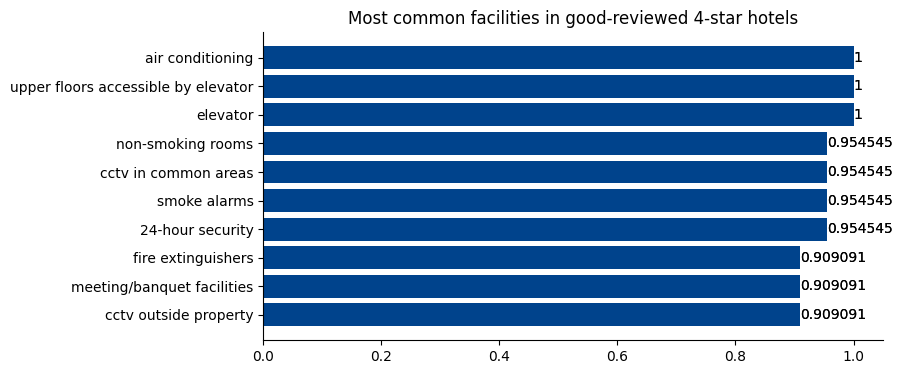

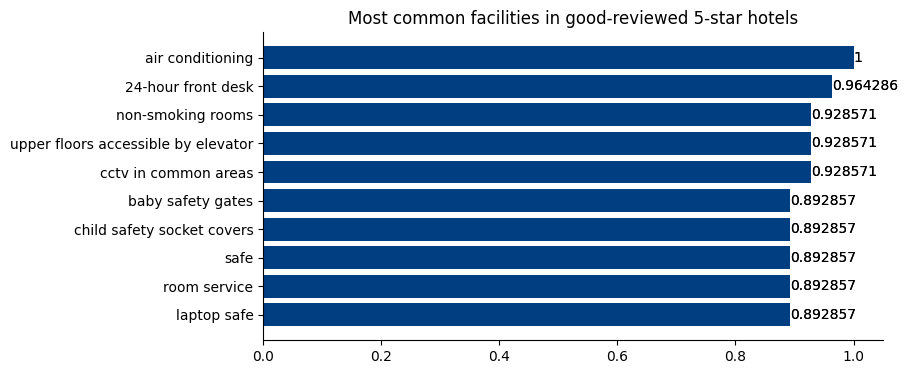

In [89]:
### Star = 1-5
def most_facs_per_star(star):
    colors = ['#bfdeff', '#80bcff', '#0059ba', '#00438c', '#003e82']
    dfs = df[(df['stars'] == star) & (df['good_review'] == 1)]
    total_cols = dfs.shape[0]
    dfs = dfs.set_index('hotel_name_')
    to_drop = ['total_facilities','stars', 'review_score', 'type of review', 'good_review']
    total_cols = dfs.shape[0]
    dfs_trans = dfs.drop(to_drop, axis=1)
    dfs_trans = dfs_trans.T
    dfs_trans['freq_of_facilities'] = dfs_trans.sum(axis = 1)
    dfs_trans['\% of freq_of_facilities'] = dfs_trans['freq_of_facilities'] / total_cols
    dfs_trans.sort_values(by=['\% of freq_of_facilities'], inplace=True, ascending=True)
    
    
    colors_l = [colors[star-1]] * 20
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.barh(dfs_trans.index[-10:], dfs_trans['\% of freq_of_facilities'].iloc[-10:], color=colors_l)
    ax.set_title(f'Most common facilities in good-reviewed {star}-star hotels')
    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)
        ax.bar_label(ax.containers[0])
    plt.show()
    
for i in range(5):
    most_facs_per_star(i+1)

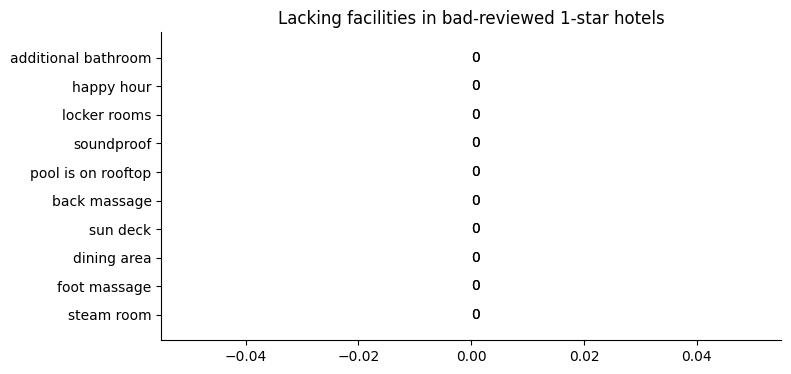

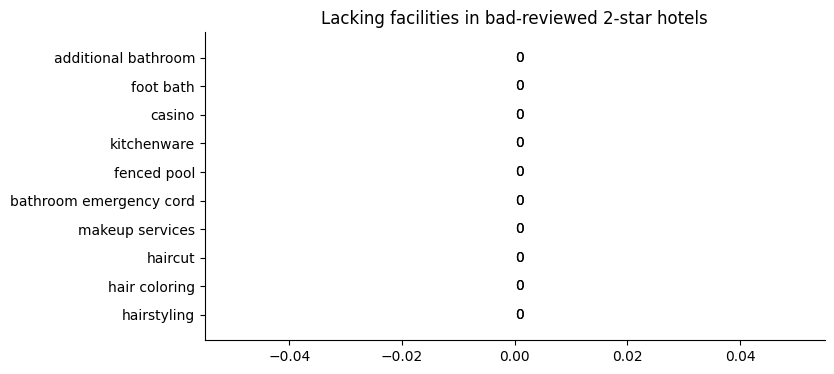

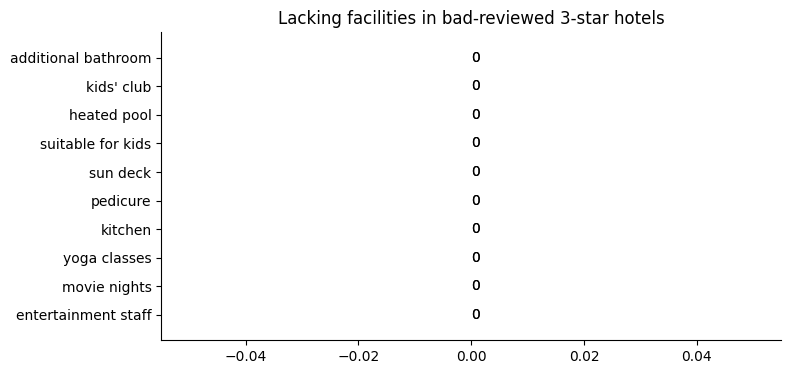

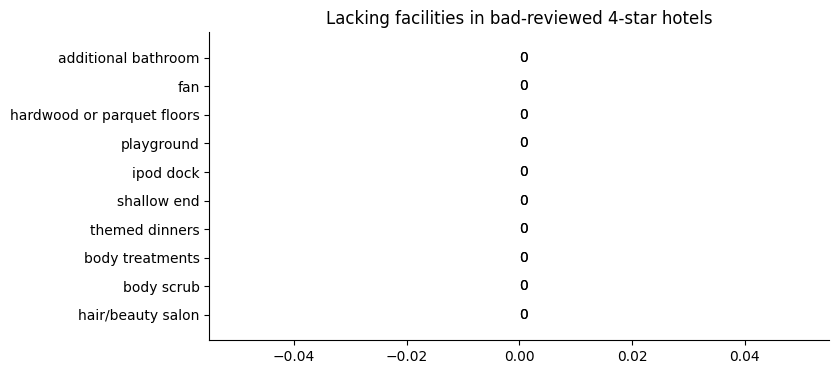

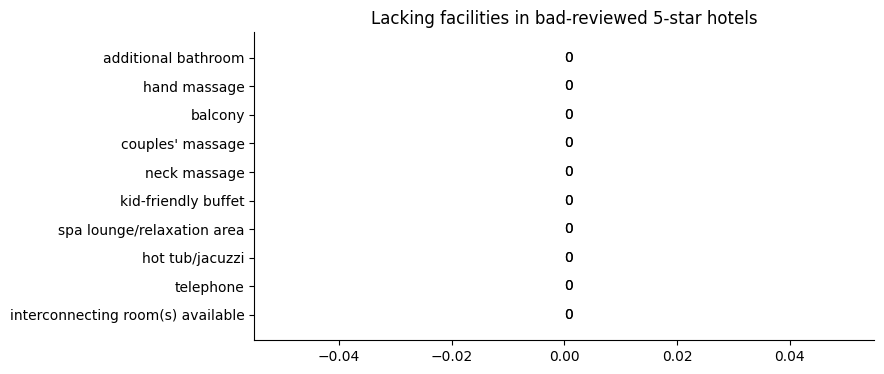

In [87]:
### Star = 1-5
def least_facs_per_star(star):
    colors = ['#bfdeff', '#80bcff', '#0059ba', '#00438c', '#003e82']
    dfs = df[(df['stars'] == star) & (df['good_review'] == 0)]
    total_cols = dfs.shape[0]
    dfs = dfs.set_index('hotel_name_')
    to_drop = ['total_facilities','stars', 'review_score', 'type of review', 'good_review']
    total_cols = dfs.shape[0]
    dfs_trans = dfs.drop(to_drop, axis=1)
    dfs_trans = dfs_trans.T
    dfs_trans['freq_of_facilities'] = dfs_trans.sum(axis = 1)
    dfs_trans['\% of freq_of_facilities'] = dfs_trans['freq_of_facilities'] / total_cols
    dfs_trans.sort_values(by=['\% of freq_of_facilities'], inplace=True, ascending=False)
    
    
    colors_l = [colors[star-1]] * 20
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.barh(dfs_trans.index[-10:], dfs_trans['\% of freq_of_facilities'].iloc[-10:], color=colors_l)
    ax.set_title(f'Lacking facilities in bad-reviewed {star}-star hotels')
    for spine in ['right', 'top']:
        ax.spines[spine].set_visible(False)
        ax.bar_label(ax.containers[0])
    plt.show()
    
for i in range(5):
    least_facs_per_star(i+1)